In [1]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


2022-12-21 09:14:22.440179: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-21 09:14:22.569905: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-21 09:14:22.569927: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-21 09:14:23.342748: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
data_dir = "dataset2"

In [3]:
batch_size = 16
img_height = 64+32
img_width = int((64+32)/2)

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)


Found 73500 files belonging to 2 classes.
Using 58800 files for training.


2022-12-21 09:14:27.154207: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-21 09:14:27.154245: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dimo-81ne): /proc/driver/nvidia/version does not exist
2022-12-21 09:14:27.154785: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 73500 files belonging to 2 classes.
Using 14700 files for validation.


In [5]:
#print(len(train_ds_chards))

In [6]:
class_names = train_ds.class_names
print(class_names)


['Crashing', 'NotCrashing']


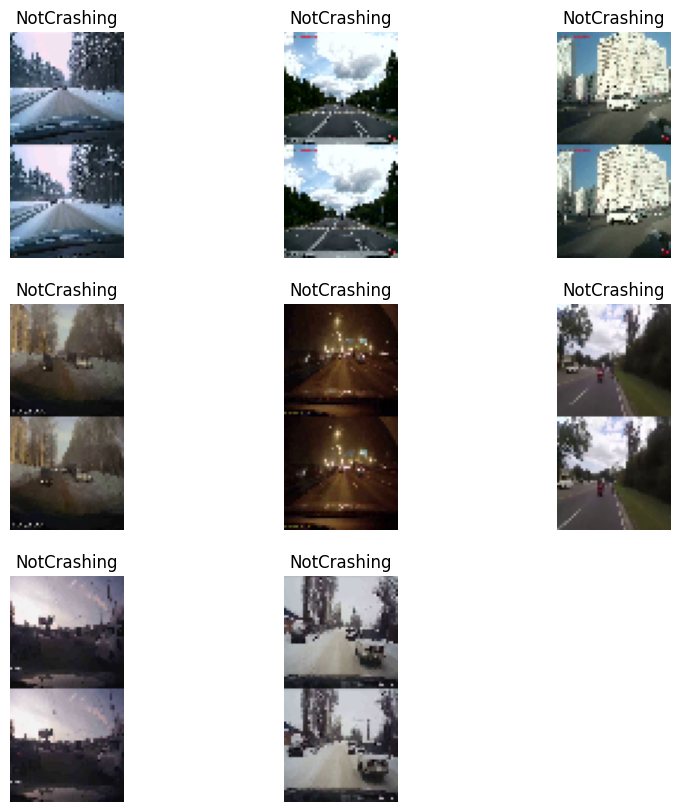

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
#understamd
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [9]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
#image_batch, labels_batch = next(iter(normalized_ds))
#first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
#print(np.min(first_image), np.max(first_image))


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [10]:
#tf.keras.applications.NASNetMobile()

In [17]:
class ModelTest1(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.Sequential([
            tf.keras.layers.Conv2D(16,(3,3)),
            tf.keras.layers.AveragePooling2D()
        ],name = "conv1")
        self.conv2 = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32,(3,3)),
            tf.keras.layers.AveragePooling2D()
        ],name = "conv2")
        self.conv3 = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32,(3,3)),
            tf.keras.layers.AveragePooling2D()
        ],name = "conv3")
        self.attention = tf.keras.layers.MultiHeadAttention(num_heads=2,key_dim=2,dropout=0.3)
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.5)
        self.final = tf.keras.layers.Dense(len(class_names),activation = "softmax")
        self.debuging = True
    
    def unsetDebuging(self):
        self.debuging = False

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.conv2(x)
        x = self.conv3(x)
        xAtt = self.attention(x,x)
        x = self.flatten(x+xAtt)
        x = self.dense1(x)
        if self.debuging == True:
            x =self.dropout(x)
        return self.final(x)



In [18]:
num_classes = len(class_names)


# model = tf.keras.Sequential([
#   tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#   tf.keras.layers.Conv2D(32, (3,3),  activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(64, (3,3),  activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(128, (3,3),  activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(num_classes, activation='softmax')
# ])
model = ModelTest1()


In [43]:
# train_ds:tf.data.Dataset = train_ds
# for i in train_ds.take(1):
#     tensorr = i[0][0]
#     break


2022-12-21 09:13:16.962365: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 423 of 1000
2022-12-21 09:13:26.949738: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 814 of 1000
2022-12-21 09:13:32.114351: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2022-12-21 09:13:32.134694: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


KeyboardInterrupt: 

In [28]:
#print(model.call(np.array([tensorr])))

In [19]:
from datetime import datetime
logdir = "logs/scalars/" +"Attention_"+ datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [22]:
epochs=5 
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
callbacks=[tensorboard_callback]
)


Epoch 1/5
3675/3675 [==============================] - 126s 34ms/step - loss: 0.8242 - accuracy: 0.7382 - val_loss: 0.5767 - val_accuracy: 0.7365
Epoch 2/5
3675/3675 [==============================] - 122s 33ms/step - loss: 0.6553 - accuracy: 0.7390 - val_loss: 0.5800 - val_accuracy: 0.7376
Epoch 3/5
3675/3675 [==============================] - 130s 35ms/step - loss: 0.5784 - accuracy: 0.7391 - val_loss: 0.5768 - val_accuracy: 0.7364
Epoch 4/5
3675/3675 [==============================] - 117s 32ms/step - loss: 0.5740 - accuracy: 0.7391 - val_loss: 0.5768 - val_accuracy: 0.7364
Epoch 5/5
3675/3675 [==============================] - 122s 33ms/step - loss: 0.5740 - accuracy: 0.7391 - val_loss: 0.5768 - val_accuracy: 0.7364


In [55]:
model.save("modelSaveMobileNetV3_"+str(model.evaluate(val_ds)[1]*100)+"%")

938/938 [==============================] - 13s 13ms/step - loss: 0.3299 - accuracy: 0.9015


INFO:tensorflow:Assets written to: modelSaveMobileNetV3_90.14666676521301%/assets


INFO:tensorflow:Assets written to: modelSaveMobileNetV3_90.14666676521301%/assets
